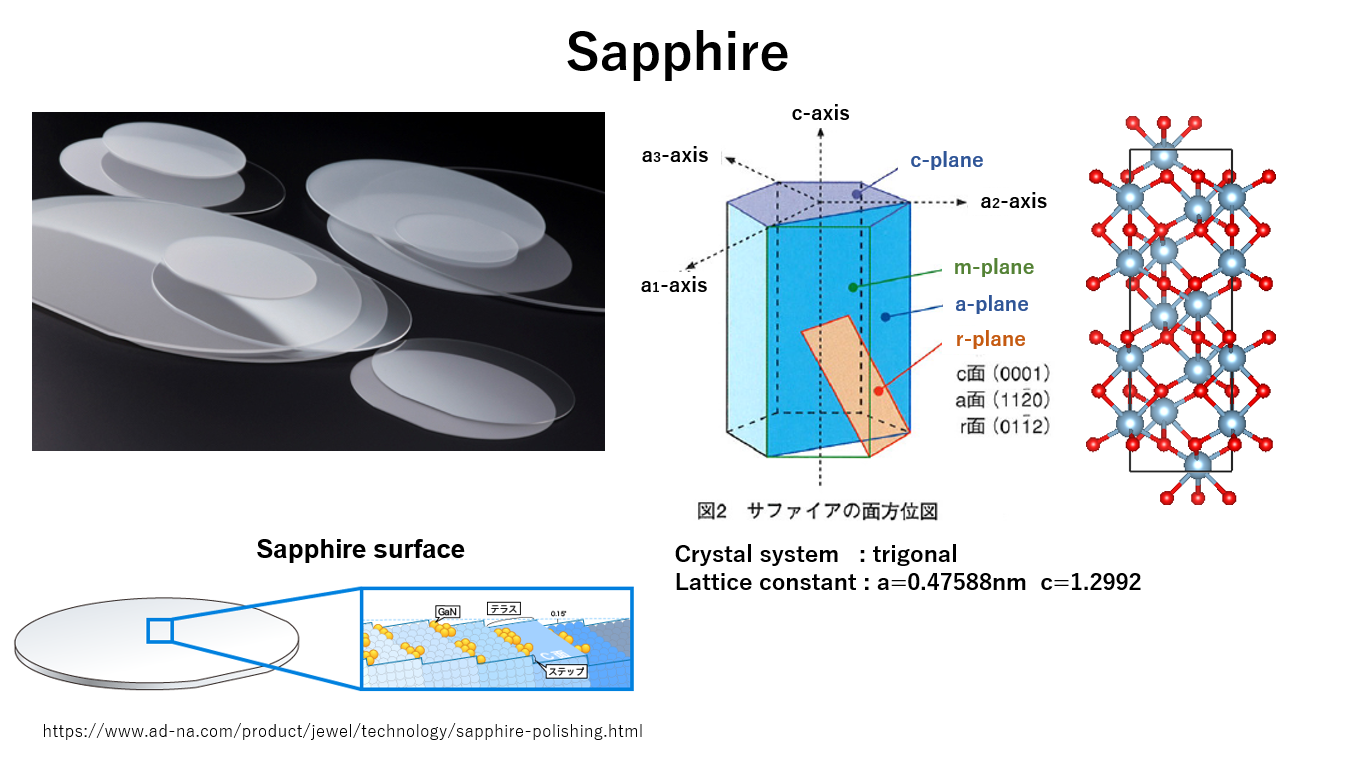

In [1]:
# possible import
# https://downloads.ccdc.cam.ac.uk/documentation/API/descriptive_docs/crystal.html

# https://docs.pybinding.site/en/stable/intro.html

In [1]:
from pathlib import Path

import numpy as np

import pymatgen

import matplotlib.pyplot as plt

import plotly.graph_objects as go

from itertools import permutations, combinations

# Cif - Pymatgen

In [2]:
ls data/cif

ls: cannot access 'data/cif': No such file or directory


In [3]:
import pymatgen.core.structure as pystructure

In [4]:
from pymatgen import Lattice, Structure, Molecule

## Load data

In [12]:
!mkdir -p tmp

In [5]:
cifs = [
    "../../combi/data/FeOXRDref/FeOx/icsd_633041.cif",
    "../../combi/data/FeOXRDref/FeOx/icsd_161294.cif",
    "../../combi/data/FeOXRDref/Fe/icsd_064998.cif",
    "../../combi/data/FeOXRDref/Fe/icsd_044862.cif",
    "../../combi/data/FeOXRDref/Fe/icsd_191817.cif"
]

for cif in cifs:
    with open(cif, "r", encoding='iso-8859-1') as f:
        text = f.read()
        
    with (Path("tmp") / Path(cif).name ).open("w") as f:
        f.write(text)

In [135]:
Fe3O4 = Structure.from_file("tmp/icsd_633041.cif")
Fe2O3 = Structure.from_file("tmp/icsd_161294.cif")
alphaFe = Structure.from_file("tmp/icsd_064998.cif")
gammaFe = Structure.from_file("tmp/icsd_044862.cif")
epsilonFe = Structure.from_file("tmp/icsd_191817.cif")

/home/aurora/anaconda3/envs/fastaiv2/lib/python3.8/site-packages/pymatgen/io/cif.py:1126: UserWarning:

Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.



In [136]:
Fe2O3.lattice, Fe3O4.lattice, alphaFe.lattice, gammaFe.lattice, epsilonFe.lattice

(Lattice
     abc : 5.035476 5.035476 13.7676
  angles : 90.0 90.0 119.99999999999999
  volume : 302.32212538138066
       A : 5.035476 0.0 3.083339782791659e-16
       B : -2.5177379999999987 4.360850136146851 3.083339782791659e-16
       C : 0.0 0.0 13.7676,
 Lattice
     abc : 8.3963 8.3963 8.3963
  angles : 90.0 90.0 90.0
  volume : 591.921128937347
       A : 8.3963 0.0 5.141250959840461e-16
       B : 1.3502280203479942e-15 8.3963 5.141250959840461e-16
       C : 0.0 0.0 8.3963,
 Lattice
     abc : 2.8662 2.8662 2.8662
  angles : 90.0 90.0 90.0
  volume : 23.546126613528003
       A : 2.8662 0.0 1.755041327858072e-16
       B : 4.6092011385031755e-16 2.8662 1.755041327858072e-16
       C : 0.0 0.0 2.8662,
 Lattice
     abc : 3.6468 3.6468 3.6468
  angles : 90.0 90.0 90.0
  volume : 48.499341095232
       A : 3.6468 0.0 2.2330209735652836e-16
       B : 5.864501678840757e-16 3.6468 2.2330209735652836e-16
       C : 0.0 0.0 3.6468,
 Lattice
     abc : 2.459 2.459 3.878
  angles : 9

In [137]:
lattice = Fe2O3.lattice

## how permuation works

In [67]:
list( permutations((1, 2, 3)) )

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

## Pymatgen structure API

In [68]:
lattice.d_hkl((0,0,1))

13.7676

In [69]:
nbrs = Fe2O3.get_all_neighbors(5)

In [70]:
dm = Fe2O3.distance_matrix

In [71]:
dm.shape

(30, 30)

In [72]:
reci_lattice = lattice.reciprocal_lattice

In [73]:
reci_lattice

Lattice
    abc : 1.4408166093804973 1.4408166093804973 0.45637477172343666
 angles : 90.00000000000001 90.00000000000001 60.00000000000002
 volume : 0.8204831622213627
      A : 1.2477837859180714 0.7204083046902482 0.0
      B : 0.0 1.4408166093804973 0.0
      C : -2.794489517013554e-17 -4.840197824686085e-17 0.45637477172343666

In [74]:
reci_lattice.matrix

array([[ 1.24778379e+00,  7.20408305e-01,  0.00000000e+00],
       [ 0.00000000e+00,  1.44081661e+00,  0.00000000e+00],
       [-2.79448952e-17, -4.84019782e-17,  4.56374772e-01]])

## Compute Reciprocal Lattice and spacing between G

In [75]:
list( range(-1, 2) )

[-1, 0, 1]

In [114]:
def create_cell_indices(n):
    indices = set
    for i in range(-n, n+1):
        for j in range(-n, n+1):
            for k in range(-n, n+1):
                # print(i,j,k)
                indices = indices.union( set(permutations((i,j,k))) )
    return list(indices)

In [115]:
def cell_xyz(lattice, n):
    indices = create_cell_indices(n)
    xyzs = lattice.matrix.T @ np.array( indices ).T
    return indices, xyzs

In [116]:
reci_lattice.matrix.shape

(3, 3)

In [117]:
# reci_indices = create_cell_indices(2)
# xyzs = reci_lattice.matrix.T @ np.array( reci_indices ).T
indices, xyzs = cell_xyz(reci_lattice, 4)

In [118]:
xyzs.shape

(3, 729)

In [119]:
lattice

Lattice
    abc : 5.035476 5.035476 13.7676
 angles : 90.0 90.0 119.99999999999999
 volume : 302.32212538138066
      A : 5.035476 0.0 3.083339782791659e-16
      B : -2.5177379999999987 4.360850136146851 3.083339782791659e-16
      C : 0.0 0.0 13.7676

In [120]:
def generate_dGs(lattice, n=2):
    """
        latttice is in A
        return dG in nm^-1
    """
    
    indices, xyzs = cell_xyz(lattice.reciprocal_lattice, n=n)
    possible_dGs = np.linalg.norm(xyzs, axis=0)
    
    return indices, possible_dGs * 10

In [121]:
indices, possible_dGs = generate_dGs(lattice, n=2) # in nm^-1

In [122]:
(-2, -2, -2) in indices

True

Text(0.5, 0, 'dG ($nm^{-1}$)')

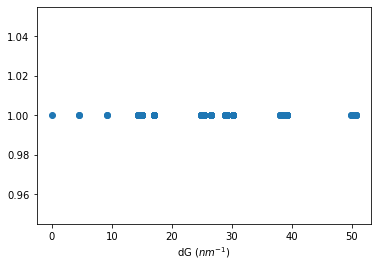

In [123]:
plt.scatter( possible_dGs, np.ones_like(possible_dGs) );
plt.xlabel("dG ($nm^{-1}$)")

## Plot lattice

In [124]:
indices, xyzs = cell_xyz(lattice, 2)

In [125]:
xyzs.shape

(3, 125)

In [126]:
xyzs_min = xyzs.min(axis=1)
xyzs_max=xyzs.max(axis=1)
xyzs_min,xyzs_max

(array([-15.106428  ,  -8.72170027, -27.5352    ]),
 array([15.106428  ,  8.72170027, 27.5352    ]))

In [127]:
fig = go.Figure()

fig.add_trace( go.Scatter3d(x=xyzs[0], y=xyzs[1], z=xyzs[2], mode="markers"))

x_scale = 1 
y_scale = (xyzs_max[1] - xyzs_min[1]) / (xyzs_max[0] - xyzs_min[0])
z_scale = (xyzs_max[2] - xyzs_min[2]) / (xyzs_max[0] - xyzs_min[0])

fig.update_layout(go.Layout(
    scene=go.layout.Scene(
        aspectmode='manual',
        aspectratio=dict(x=x_scale, y=y_scale, z=z_scale)
    )
))

# plot reciprocal lattice

In [128]:
indices, xyzs = cell_xyz(reci_lattice, 2)

In [129]:
xyzs.shape

(3, 125)

In [130]:
xyzs_min = xyzs.min(axis=1)
xyzs_max=xyzs.max(axis=1)
xyzs_min,xyzs_max

(array([-2.49556757, -4.32244983, -0.91274954]),
 array([2.49556757, 4.32244983, 0.91274954]))

In [131]:
fig = go.Figure()

fig.add_trace( go.Scatter3d(x=xyzs[0], y=xyzs[1], z=xyzs[2], mode="markers"))

x_scale = 1 
y_scale = (xyzs_max[1] - xyzs_min[1]) / (xyzs_max[0] - xyzs_min[0])
z_scale = (xyzs_max[2] - xyzs_min[2]) / (xyzs_max[0] - xyzs_min[0])

fig.update_layout(go.Layout(
    scene=go.layout.Scene(
        aspectmode='manual',
        aspectratio=dict(x=x_scale, y=y_scale, z=z_scale)
    )
))

## Testing

In [ ]:
fig = go.Figure()

hexagonal = np.array([
    [0,0,0],
    [-2,0,0],
    [-1,np.sqrt(3),0],
    [1, np.sqrt(3), 0],
    [2, 0, 0],
    [-1,-np.sqrt(3),0],
    [1,-np.sqrt(3),0],    
])

hexagonal_min = hexagonal.min(axis=0)
hexagonal_max = hexagonal.max(axis=0)

fig.add_trace( go.Scatter3d(x=hexagonal[:,0], y=hexagonal[:,1], z=hexagonal[:,2], mode="markers"))

hexagonal

x_scale = 1 
y_scale = (hexagonal_max[1] - hexagonal_min[1]) / (hexagonal_max[0] - hexagonal_min[0])  
z_scale = 1

fig.update_layout(go.Layout(
    scene=go.layout.Scene(
        aspectmode='manual',
        aspectratio=dict(x=x_scale, y=y_scale, z=z_scale)
    )
))

# fig.update_layout(go.Layout(
#     scene=go.layout.Scene(
#         aspectmode='manual',
#         aspectratio=dict(x=1, y=1, z=0.2)
#     )
# ))

# RHEED result

In [132]:
from IPython.display import display, Image

In [133]:
ls publication

Cluster_Silhouette_Score.png      phasemapping_backbone.html
cover_input.png                   phasemapping_backbone.png
cover_output.png                  phasemapping_backbone.svg
db_figure/                        phasemapping_cluster.html
fig1.eps                          phasemapping_cluster.png
fig1.svg                          phasemapping_cluster.svg
label_prediction_compare.png      pie_phase/
label_prediction_image_label.png  regions_directbeam.png
overlap_peaks.png                 rheed_phase_pie.png
peak_distance.png


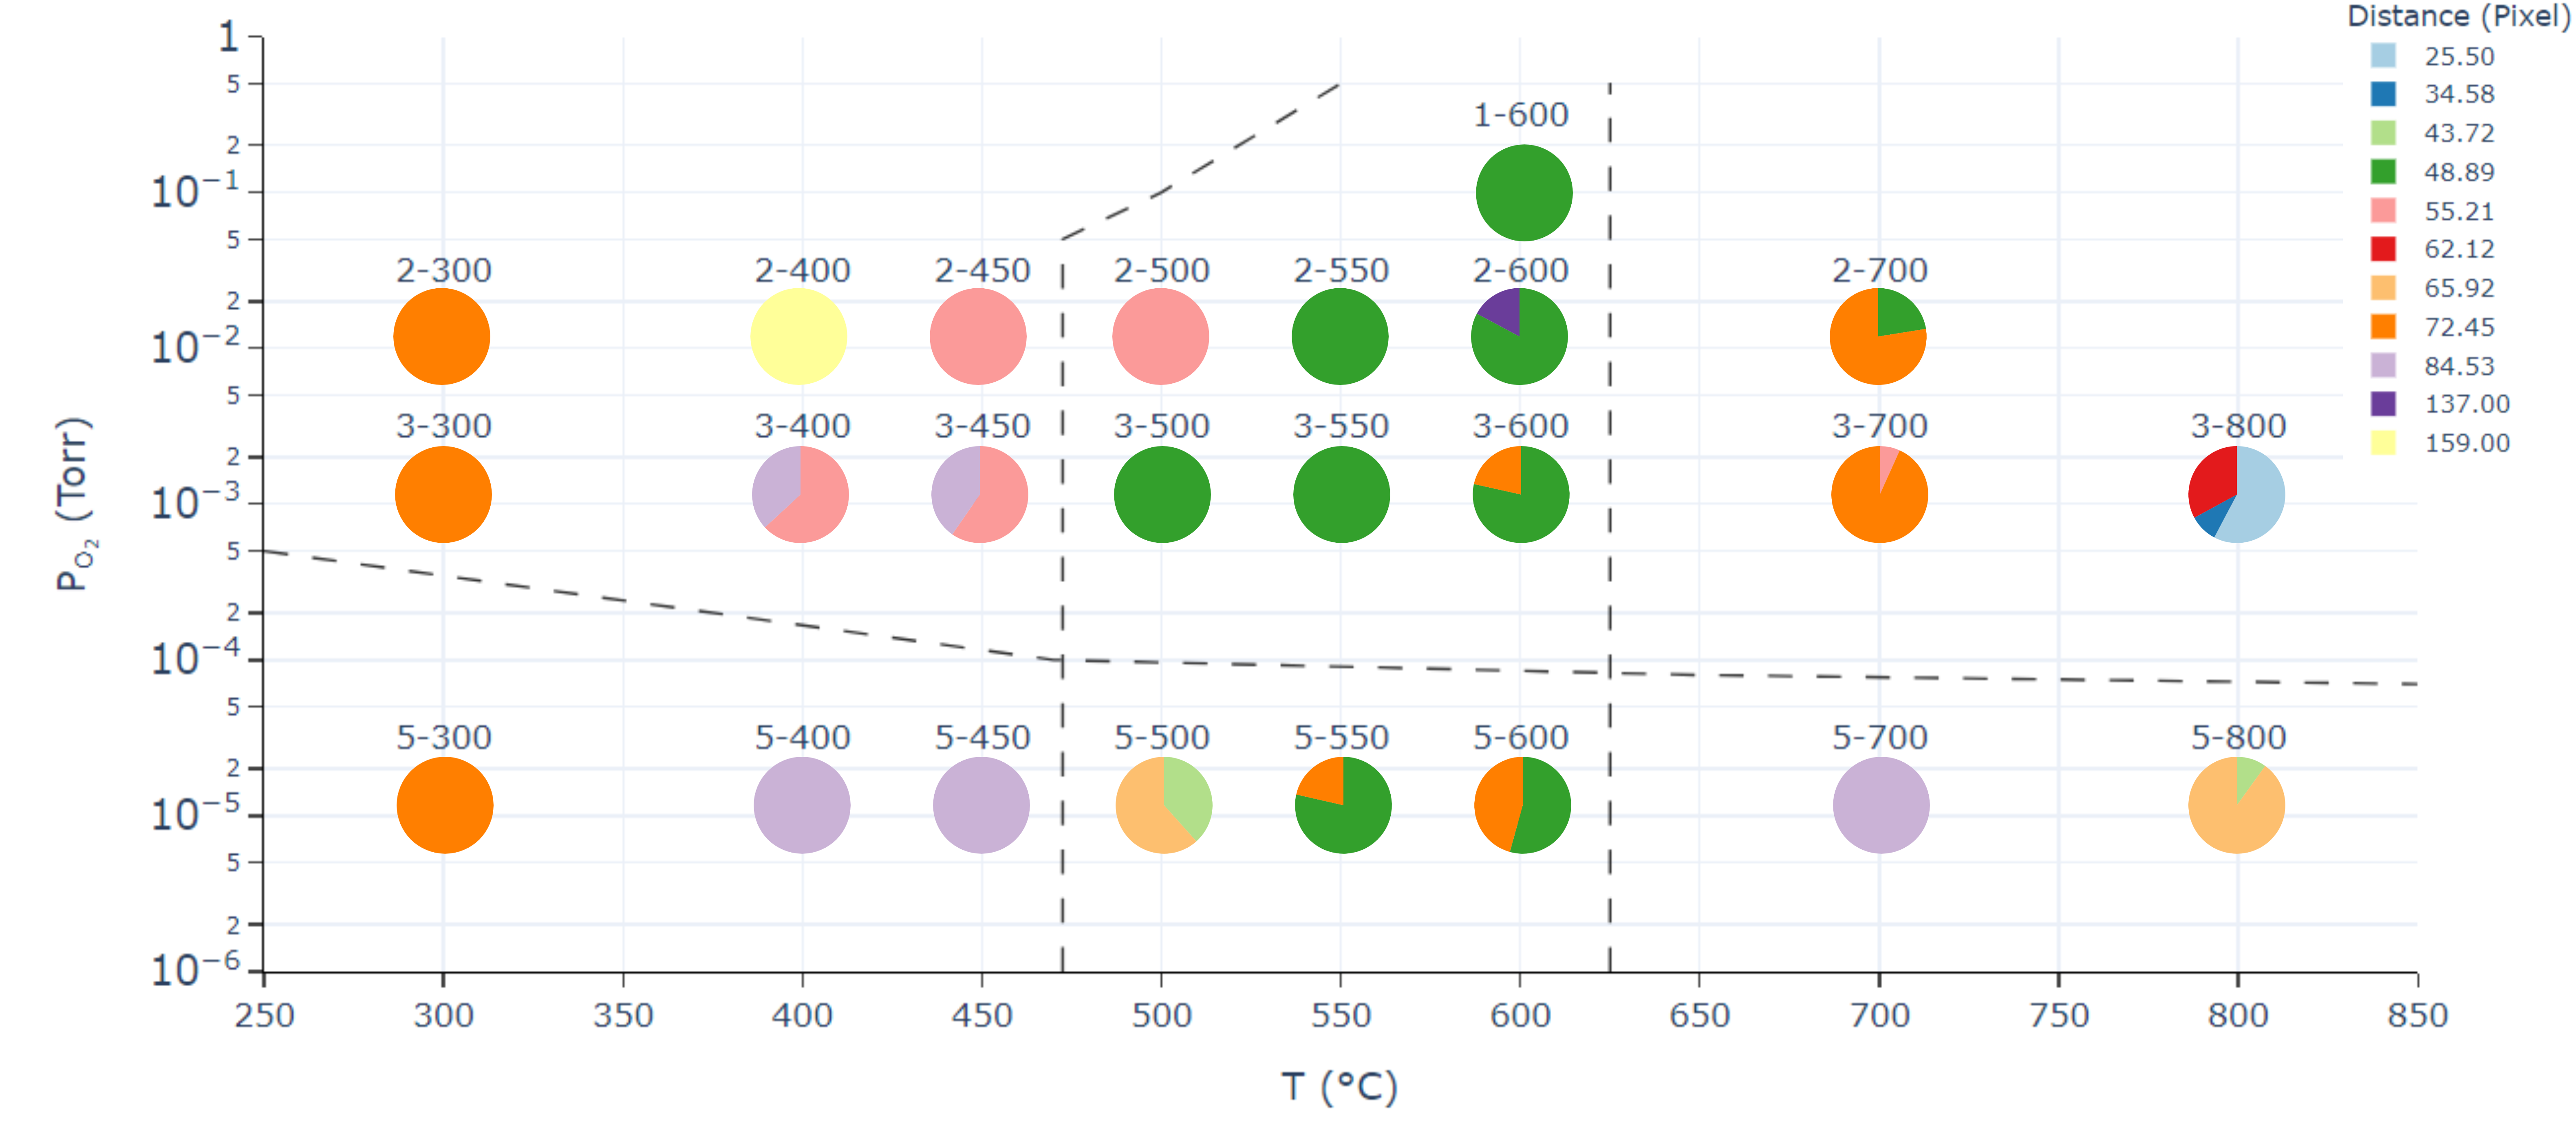

In [134]:
Image("publication/rheed_phase_pie.png")

In [16]:
from rhana.io.kashiwa import *

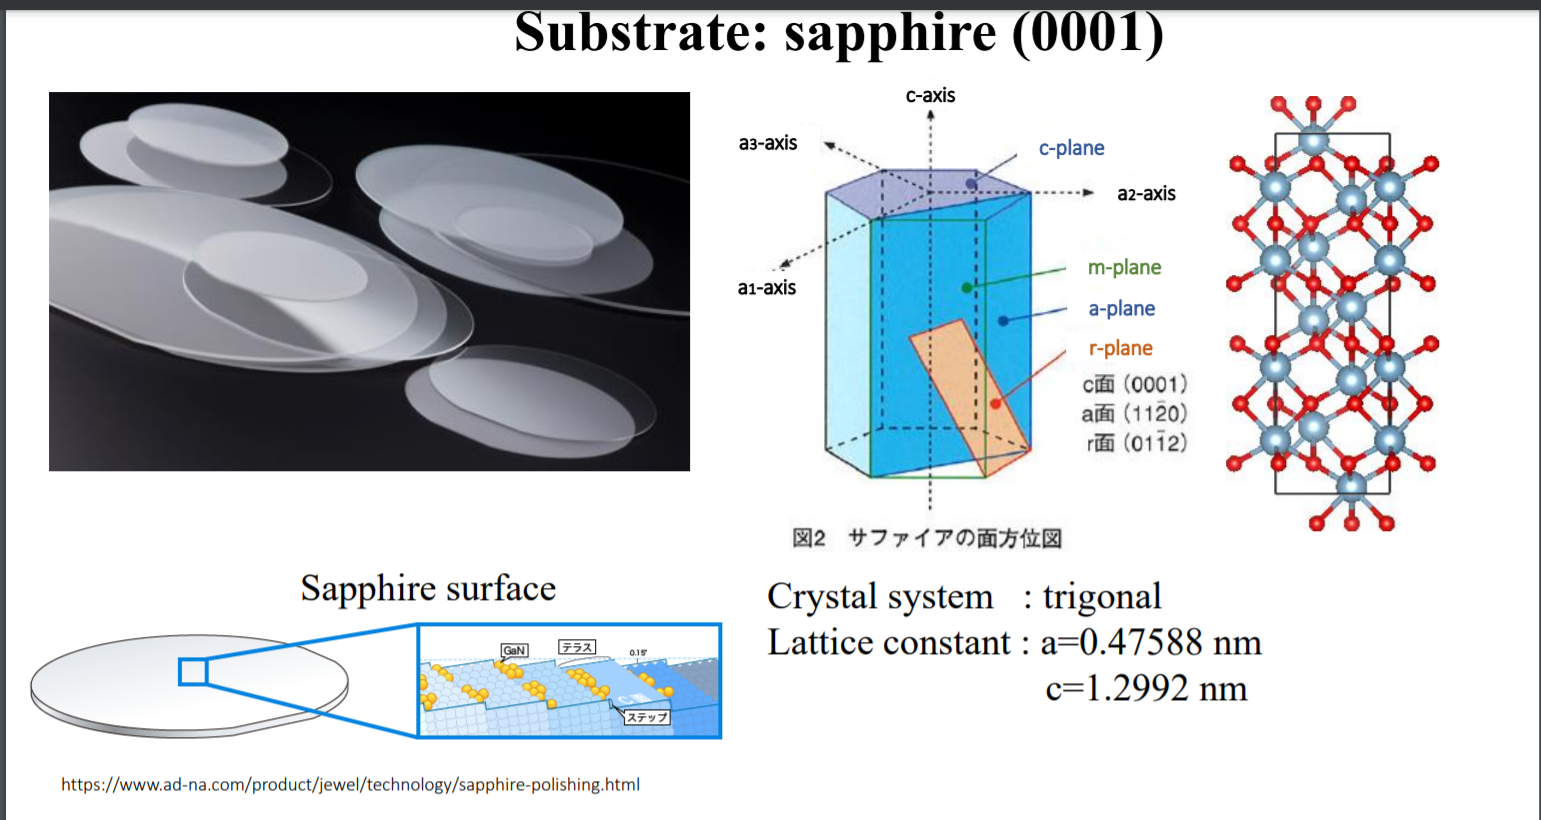

In [ ]:
# reference uvw <-> uvv'w  hkl <-> hkil
# 

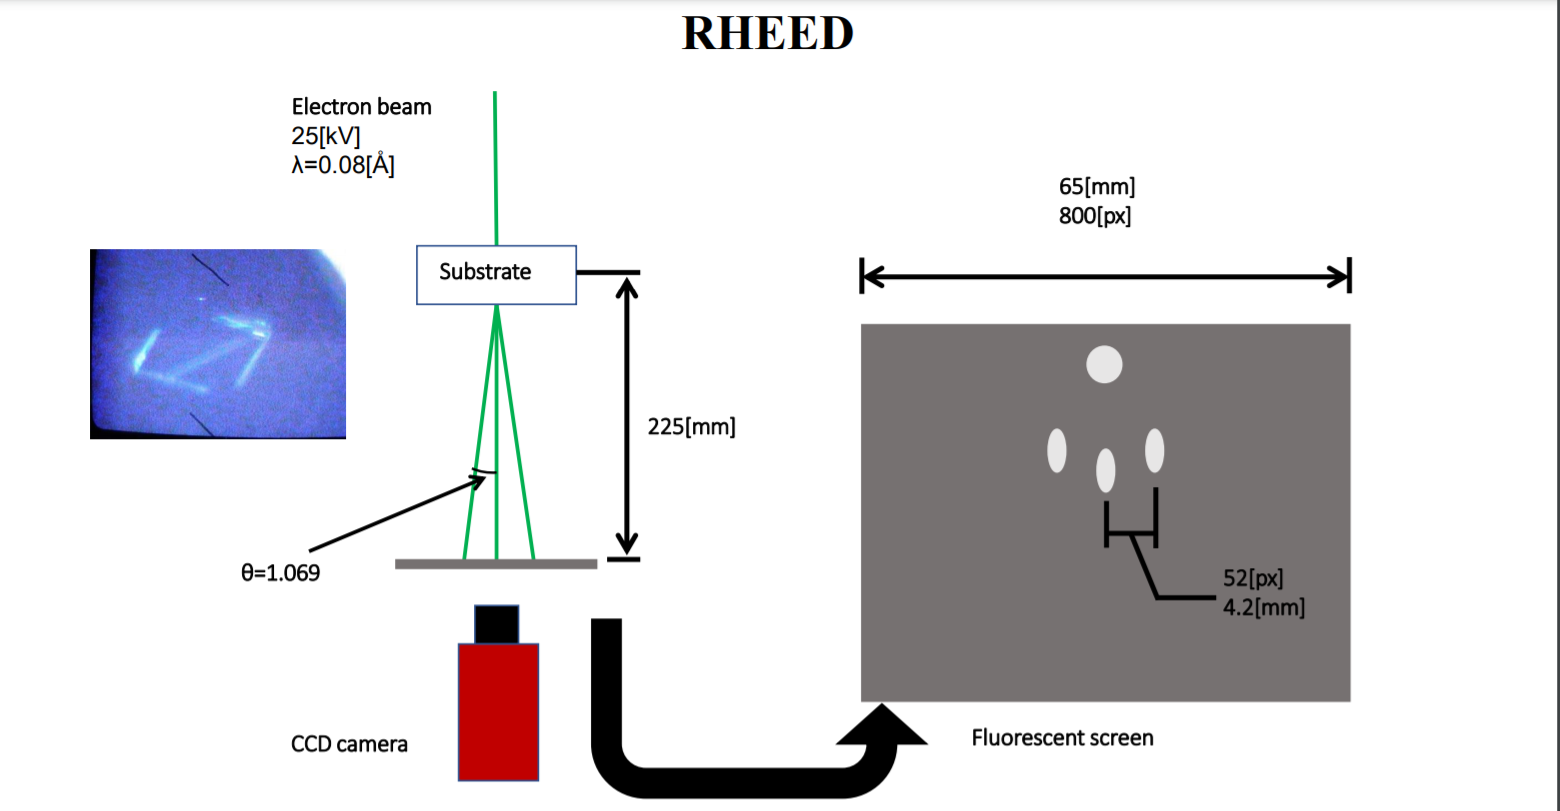

# Recalculate the wavelength

In [17]:
# me = 510998.946 # in electron volts / (the speed of light^2)
me = 9.10938356e-31 # in kilograms
# h = 4.1357e-15 # in eV s
h = 6.62607004e-34 #in m2 kg / s

In [18]:
E = 25e3 * 1.6022e-19 # 25keV to J
# E = 2 * 1.6022e-19

In [19]:
K = h / (me * np.sqrt( 2 * E / me ) ) * 1e10; K

0.07756542240588805

In [20]:
pc = 0.01

In [21]:
Es = np.linspace(23, 25, 100) * 1e3 * 1.6022e-19

In [22]:
Ks = h / (me * np.sqrt( 2 * Es / me ) ) * 1e10

In [23]:
import matplotlib.pyplot as plt

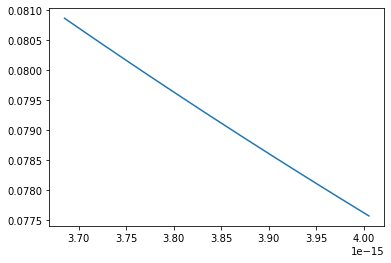

In [24]:
plt.plot(Es, Ks)

In [25]:
Ks.max(), Ks.min(), Ks.mean()

(0.08086754302026623, 0.07756542240588805, 0.07918241828088624)

In [26]:
Ks.max() / K - 1, Ks.min() / K - 1

(0.0425720702853738, 0.0)

# Calculate the Experimental Parameters

In [27]:
from rhana.io.kashiwa import kashiwa_config

In [28]:
from rhana.pattern import RheedConfig

In [30]:
# all unit in length is in mm
config = RheedConfig(
    sub_ccd_dist = 225,
    pixel_real = 65 / 800,
    ccd_cam_width = 65,
    ccd_cam_height = 48.75,
    max_intensity = 16383,
    wave_length = 0.079 * 1e-7,
)

# config = RheedConfig(**kashiwa_config)

# Compute G from pixel distance

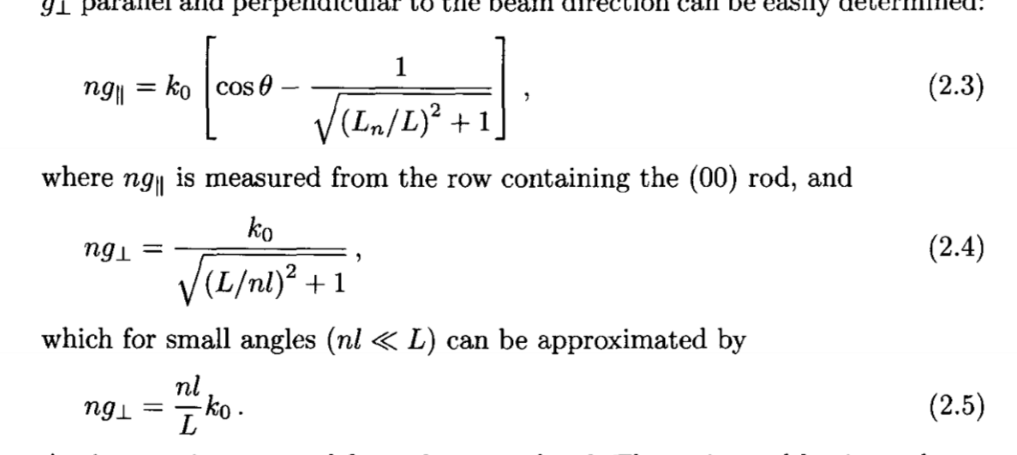

In [90]:
import numpy as np

In [152]:
def horizontal_distance(dist, config):
    """
        ng perpendicular to beam direaction
        dg is in nm^-1
    """
    real_dist = config.pixel_real * dist
    # print(real_dist)
    k0 = 2*np.pi/config.wave_length
    # print(k0)
    r = (config.sub_ccd_dist/real_dist)**2
    return k0 / np.sqrt( r + 1) * 1e-6

In [155]:
dg = horizontal_distance(52, config)
dg

14.932083799769005

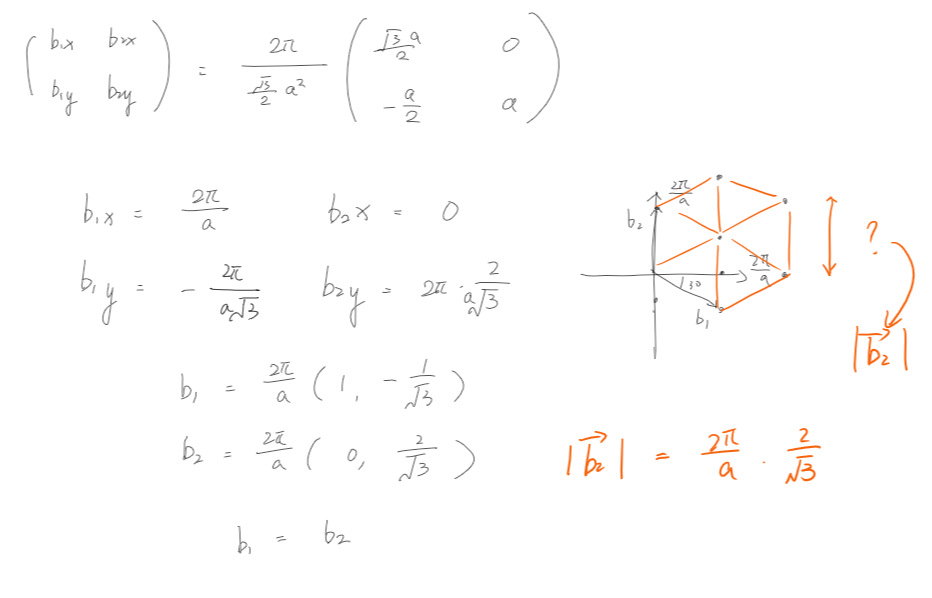

In [35]:
def _reci2real_hex_c_0010(dg):
    """
        dg is in nm^-1
        return a in A
    """
    
    hex_a = 1 / ( dg/10 / 2 / np.pi / (2/np.sqrt(3)) )
    return hex_a 

In [163]:
# in A
hex_a = _reci2real_hex_c_0010(dg)
hex_a

4.858797709834114

In [164]:
target_hex_a = 0.47588 * 10

In [165]:
(hex_a - target_hex_a) / 4.77

0.020963880468367772

In [166]:
error = ((hex_a - target_hex_a) / target_hex_a) * 100
f"{error:.2}%"

'2.1%'

In [34]:
def _reci2real_iso(dg):
    return (1 / ( dg / 10 / 2 / np.pi )) 

In [227]:
# ds = [25.5, 34.58, 43.72, 48.89, 55.21, 62.12, 72.45, 84.53, 137.00, 159.00]
# # ds = [25.8, 39.5, 49.0, 64.5, 72.8, 83.8, 94.5, 98.2, 138.2, 170.8] #old

In [228]:
# dgs = np.array([ horizontal_distance(d, config) for d in ds]) # dg is in nm^-1 now

In [229]:
# dgs

array([ 7.32344454,  9.930812  , 12.55508519, 14.03931744, 15.85349722,
       17.83675445, 20.80096279, 24.26622739, 39.2991699 , 45.59067967])

In [31]:
# extracted from phase mapping
dgs = np.array([7.2, 9.8, 13.8, 17.6, 20.4, 38.5])

# Calculate what we found

## dG to lattice parameter

In [36]:
hex_as = [_reci2real_hex_c_0010(dg) for dg in dgs]

In [37]:
iso_as = [_reci2real_iso(dg) for dg in dgs]

In [39]:
print("dG", "hex a", "fcc a", "iso a", sep="\t")
print("nm-1", "A", "A", "A", sep="\t")
for  dg, hex_a, iso_a in zip( dgs, hex_as, iso_as):
    print( round(dg,2), round(hex_a, 2), round(hex_a*np.sqrt(2), 2) , round(iso_a, 2), sep="\t" )

dG	hex a	fcc a	iso a
nm-1	A	A	A
7.2	10.08	14.25	8.73
9.8	7.4	10.47	6.41
13.8	5.26	7.44	4.55
17.6	4.12	5.83	3.57
20.4	3.56	5.03	3.08
38.5	1.88	2.67	1.63


In [138]:
Fe2O3_indices, Fe2O3_dGs = generate_dGs(Fe2O3.lattice, n=4)
Fe3O4_indices, Fe3O4_dGs = generate_dGs(Fe3O4.lattice, n=4)
alphaFe_indices, alphaFe_dGs = generate_dGs(alphaFe.lattice, n=4)
gammaFe_indices, gammaFe_dGs = generate_dGs(gammaFe.lattice, n=4)
epsilonFe_indices, epsilonFe_dGs = generate_dGs(epsilonFe.lattice, n=4)

In [139]:
from sklearn.metrics import pairwise_distances

In [164]:
Fe2O3.lattice.matrix 

array([[ 5.03547600e+00,  0.00000000e+00,  3.08333978e-16],
       [-2.51773800e+00,  4.36085014e+00,  3.08333978e-16],
       [ 0.00000000e+00,  0.00000000e+00,  1.37676000e+01]])

In [207]:
vector = np.array([1, 2, 0])[None, :]

In [209]:
vector.shape

(1, 3)

In [222]:
direction = np.array([1, 2, 0])[None, :] @ Fe2O3.lattice.matrix 

In [223]:
Fe2O3.lattice.reciprocal_lattice.matrix

array([[ 1.24778379e+00,  7.20408305e-01,  0.00000000e+00],
       [ 0.00000000e+00,  1.44081661e+00,  0.00000000e+00],
       [-2.79448952e-17, -4.84019782e-17,  4.56374772e-01]])

In [242]:
np.rad2deg( 
    np.arccos( 
        np.array([ 1.24778379e+00,  7.20408305e-01,  0.00000000e+00]) @ 
        np.array([ 0.00000000e+00,  1.44081661e+00,  0.00000000e+00]) /1.44/1.44 )
)

59.96246386957058

In [ ]:
np.c

In [282]:
def compute_G(hkl, lattice):
    plane = np.array(hkl)[None, :] @ lattice.reciprocal_lattice.matrix
    return plane

def compute_direction(ijk, lattice):
    direction = np.array(ijk)[None, :] @ lattice.matrix
    return direction

def is_ortho(direction, plane):
    cos_sim = ( (direction @ plane.T)[0][0] / np.linalg.norm(direction) / np.linalg.norm(plane) )
    
    return  abs(cos_sim) < 1e-5

In [283]:
plane = np.array([-2, 1, 0])[None, :] @ Fe2O3.lattice.reciprocal_lattice.matrix

In [284]:
direction

array([[2.66453526e-15, 8.72170027e+00, 9.25001935e-16]])

In [285]:
plane

array([[-2.49556757e+00,  8.88178420e-16,  0.00000000e+00]])

In [286]:
direction @ plane.T

array([[1.09689818e-15]])

In [299]:
is_ortho(direction, plane)

True

In [300]:
is_ortho(direction, direction)

False

In [289]:
Fe2O3_dGs[:5]

array([55.06344472, 53.72325745, 57.81307634, 55.06344472, 38.39263659])

In [290]:
print("Index", "G", sep="\t")
print("Miller", "nm-1", sep="\t")

idx = np.argsort(Fe2O3_dGs)
for i in range(len(Fe2O3_dGs)):
    print( " ".join(map(str, Fe2O3_indices[idx[i]])), round(Fe2O3_dGs[idx[i]]*10,2), sep="\t" )
    if i>10 : break

Index	G
Miller	nm-1
0 0 0	0.0
0 0 1	45.64
0 0 -1	45.64
0 0 2	91.27
0 0 -2	91.27
0 0 3	136.91
0 0 -3	136.91
-1 0 0	144.08
0 1 0	144.08
1 0 0	144.08
0 -1 0	144.08
-1 1 0	144.08


## Matching Phases

In [291]:
def match_phases(dGs, lattice_dGs, lattice_indices, thres=0.07):
    x = dGs
    y = lattice_dGs
    exp_cif_simi = pairwise_distances( x[:,None], y[:,None] )
    idx= np.where( exp_cif_simi < (dGs * thres)[:, None] )
    
    return idx

In [292]:
def plot_match(dGs, lattice_dGs, lattice_indices, idx, conditions=None):
    print("dG", "Index", "dG", sep="\t")
    print("nm-1", "Miller", "nm-1", sep="\t")

    for i, j in zip(*idx):
        if conditions is not None:
            flag = True
            for condition in conditions:
                flag = flag and condition(lattice_indices[j])
            if not flag:
                continue
        print(round(dGs[i],2), " ".join(map(str,lattice_indices[j])), round(lattice_dGs[j],2), sep="\t" )

### Match Fe2O3

In [330]:
idx = match_phases(dgs, Fe2O3_dGs, Fe2O3_indices, 0.3)

In [331]:
Fe2O3_direction = compute_direction((1, 1, 0), Fe2O3.lattice)

In [332]:
Fe2O3_direction

array([[2.51773800e+00, 4.36085014e+00, 6.16667957e-16]])

In [346]:
conditions = [
    lambda x: x[2]==0,
    lambda x: is_ortho(Fe2O3_direction, compute_G(x, Fe2O3.lattice) )
]

In [347]:
plot_match(dgs, Fe2O3_dGs, Fe2O3_indices, idx,  conditions)

dG	Index	dG
nm-1	Miller	nm-1
13.8	1 -1 0	14.41
13.8	-1 1 0	14.41
17.6	1 -1 0	14.41
17.6	-1 1 0	14.41
20.4	1 -1 0	14.41
20.4	-1 1 0	14.41
38.5	-3 3 0	43.22
38.5	3 -3 0	43.22
38.5	2 -2 0	28.82
38.5	-2 2 0	28.82


In [341]:
Fe2O3_direction @ compute_G((-1, 1, 0), Fe2O3.lattice).T

array([[0.]])

In [343]:
is_ortho(Fe2O3_direction, compute_G((-1, 1, 0), Fe2O3.lattice))

True

### Match Fe3O4

In [232]:
idx = match_phases(dgs, Fe3O4_dGs, Fe3O4_indices, 0.03)

In [233]:
plot_match(ds, dgs, Fe3O4_dGs, Fe3O4_indices, idx)

spacing	dG	Index	dG
pixel	nm-1	Miller	nm-1
25.5	7.32	1 0 0	7.48
25.5	7.32	0 0 1	7.48
25.5	7.32	0 1 0	7.48
62.12	17.84	1 2 1	18.33
62.12	17.84	2 1 1	18.33
62.12	17.84	1 1 2	18.33
72.45	20.8	0 2 2	21.17
72.45	20.8	2 0 2	21.17
72.45	20.8	2 2 0	21.17
84.53	24.27	0 3 1	23.66
84.53	24.27	0 1 3	23.66
84.53	24.27	3 1 0	23.66
84.53	24.27	1 0 3	23.66
84.53	24.27	1 3 0	23.66
84.53	24.27	3 0 1	23.66
84.53	24.27	1 1 3	24.82
84.53	24.27	1 3 1	24.82
84.53	24.27	3 1 1	24.82
137.0	39.3	3 3 3	38.88
137.0	39.3	3 1 4	38.16
137.0	39.3	4 3 1	38.16
137.0	39.3	1 3 4	38.16
137.0	39.3	1 4 3	38.16
137.0	39.3	3 4 1	38.16
137.0	39.3	4 1 3	38.16
137.0	39.3	4 3 2	40.3
137.0	39.3	3 4 2	40.3
137.0	39.3	3 2 4	40.3
137.0	39.3	2 3 4	40.3
137.0	39.3	2 4 3	40.3
137.0	39.3	4 2 3	40.3
159.0	45.59	2 4 4	44.9
159.0	45.59	4 2 4	44.9
159.0	45.59	4 4 2	44.9


### Match Alpha Fe

In [240]:
idx = match_phases(dgs, alphaFe_dGs, alphaFe_indices, 0.1)

In [241]:
plot_match(ds, dgs, alphaFe_dGs, alphaFe_indices, idx)

spacing	dG	Index	dG
pixel	nm-1	Miller	nm-1
72.45	20.8	1 0 0	21.92
72.45	20.8	0 0 1	21.92
72.45	20.8	0 1 0	21.92
84.53	24.27	1 0 0	21.92
84.53	24.27	0 0 1	21.92
84.53	24.27	0 1 0	21.92
137.0	39.3	1 1 1	37.97
159.0	45.59	0 2 0	43.84
159.0	45.59	0 0 2	43.84
159.0	45.59	2 0 0	43.84
159.0	45.59	0 2 1	49.02
159.0	45.59	1 2 0	49.02
159.0	45.59	2 1 0	49.02
159.0	45.59	2 0 1	49.02
159.0	45.59	0 1 2	49.02
159.0	45.59	1 0 2	49.02


### Match Gamma Fe

In [242]:
idx = match_phases(dgs, gammaFe_dGs, gammaFe_indices, 0.1)

In [243]:
plot_match(ds, dgs, gammaFe_dGs, gammaFe_indices, idx)

spacing	dG	Index	dG
pixel	nm-1	Miller	nm-1
55.21	15.85	1 0 0	17.23
55.21	15.85	0 0 1	17.23
55.21	15.85	0 1 0	17.23
62.12	17.84	1 0 0	17.23
62.12	17.84	0 0 1	17.23
62.12	17.84	0 1 0	17.23
84.53	24.27	1 0 1	24.37
84.53	24.27	1 1 0	24.37
84.53	24.27	0 1 1	24.37
137.0	39.3	0 2 1	38.53
137.0	39.3	1 2 0	38.53
137.0	39.3	2 1 0	38.53
137.0	39.3	2 0 1	38.53
137.0	39.3	0 1 2	38.53
137.0	39.3	1 0 2	38.53
137.0	39.3	1 2 1	42.2
137.0	39.3	2 1 1	42.2
137.0	39.3	1 1 2	42.2
159.0	45.59	1 2 1	42.2
159.0	45.59	2 1 1	42.2
159.0	45.59	1 1 2	42.2
159.0	45.59	0 2 2	48.73
159.0	45.59	2 0 2	48.73
159.0	45.59	2 2 0	48.73


### Match Epsilon Fe

In [252]:
idx = match_phases(dgs, epsilonFe_dGs, epsilonFe_indices, 0.1)

In [253]:
plot_match(ds, dgs, epsilonFe_dGs, epsilonFe_indices, idx)

spacing	dG	Index	dG
pixel	nm-1	Miller	nm-1
55.21	15.85	0 0 1	16.2
62.12	17.84	0 0 1	16.2
159.0	45.59	0 1 2	43.82
159.0	45.59	1 0 2	43.82
159.0	45.59	0 0 3	48.61


In [247]:
epsilonFe_dGs

array([  0.        ,  29.50466636,  16.20212818,  29.50466636,
        33.66057478,  51.10358119,  33.66057478,  53.61049308,
        59.00933271,  32.40425635,  59.00933271,  61.19322107,
        78.06200969,  78.06200969,  61.19322107,  43.82420754,
        43.82420754,  79.7256942 ,  79.7256942 ,  60.51125383,
        67.32114955,  67.32114955, 102.20716238,  84.52048975,
        84.52048975, 103.4833948 , 107.22098615,  88.51399907,
        88.51399907,  48.60638453,  89.98464863,  56.86040761,
       106.38058741,  56.86040761, 106.38058741,  89.98464863,
        70.52770114, 107.60733402, 107.60733402, 128.60785901,
        76.45051971,  94.25902536,  76.45051971,  94.25902536,
       128.60785901, 111.20640812,  91.95791415,  91.95791415,
       129.62442037, 111.20640812, 129.62442037, 113.17634319,
       132.62736229, 132.62736229, 153.31074357, 100.98172433,
       100.98172433, 116.95900989, 154.16449997, 116.95900989,
       137.4865885 , 156.6978619 , 137.4865885 , 160.83

In [246]:
ds

[25.5, 34.58, 43.72, 48.89, 55.21, 62.12, 72.45, 84.53, 137.0, 159.0]